<a href="https://colab.research.google.com/github/Kathezco/eda_couse/blob/main/Quiz2_PARTE2_KE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad ICESI**

Aprendizaje Automático I

# Quiz 2 - Parte 2

**Objetivo:**  
Implementar y evaluar un modelo de regresión logística utilizando un dataset de clasificación de scikit‑learn. Deberás completar los bloques de código indicados, responder preguntas y justificar tus decisiones.

**Temas a evaluar:**

- Carga y exploración de datos  
- Normalización de características  
- Entrenamiento de un modelo de regresión logística  
- Evaluación del rendimiento (matriz de confusión, accuracy, curva ROC y AUC)  
- Interpretación de coeficientes y resultados

**Instrucciones Generales:**

1. Lee detenidamente cada sección y sigue las instrucciones proporcionadas.  
2. Completa los espacios indicados con tu código y comentarios que expliquen tus decisiones.  
3. Responde las preguntas de reflexión al final del examen en celdas Markdown adicionales.  
4. Se evaluará la calidad del código, la claridad de los comentarios y la interpretación de los resultados.
¡Buena suerte!

## Sección 1: Preparación del Entorno

**Objetivos:**  

- Importar las librerías necesarias.  
- Configurar la semilla para garantizar la reproducibilidad.

**Tareas:**

1. Importa `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn` y las funciones necesarias de scikit‑learn.
2. Establece una semilla aleatoria (por ejemplo, 42).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

# Configurar la semilla para reproducibilidad

In [2]:
np.random.seed(42)

## Sección 2: Carga y Exploración del Dataset

**Objetivos:**  
- Cargar el dataset de cáncer de mama de scikit‑learn.  
- Convertir los datos en un DataFrame de pandas.  
- Explorar el dataset: dimensiones, primeras filas y distribución de la variable objetivo.

**Tareas:**  
1. Utiliza la función `load_breast_cancer()` para cargar los datos.  
2. Crea un DataFrame con las características y agrega la columna 'target'.  
3. Muestra el tamaño del dataset, las primeras filas y la distribución de las clases.


# Completa el siguiente código:

In [11]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Mostrar dimensiones y primeras filas
print('El tamaño del data set es:',df.shape)

print(df.head())

# Distribución de la variable objetivo
df['target'].value_counts()


El tamaño del data set es: (569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst pe

,count
target,
1,357
0,212


## Sección 3: Preprocesamiento y Normalización de Datos

**Objetivos:**  

- Separar las variables predictoras (X) y la variable respuesta (y).  
- Dividir el dataset en conjunto de entrenamiento y prueba (70%-30%).  
- Normalizar las características utilizando `StandardScaler`.

**Tareas:**  

1. Define X como todas las columnas excepto 'target' y y como la columna 'target'.  
2. Usa `train_test_split` (con `stratify=y`) para preservar la distribución de clases.  
3. Ajusta el escalador con el conjunto de entrenamiento y transforma ambos conjuntos.

# Completa el siguiente código:

In [14]:
#1 Definiendo variables
X=df.drop('target',axis=1)
y=df['target']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## Sección 4: Entrenamiento del Modelo de Regresión Logística

**Objetivos:**  
- Instanciar y entrenar el modelo de regresión logística con los datos normalizados.  
- Visualizar y analizar los coeficientes obtenidos.

**Tareas:**  

1. Crea una instancia de `LogisticRegression` (sugerencia: utiliza el solver 'liblinear').  
2. Ajusta el modelo con el conjunto de entrenamiento normalizado.  
3. Imprime el intercepto y los coeficientes asociados a cada variable.
4. Agrega comentarios interpretando qué significa un coeficiente positivo o negativo en este contexto.

# Completa el siguiente código:

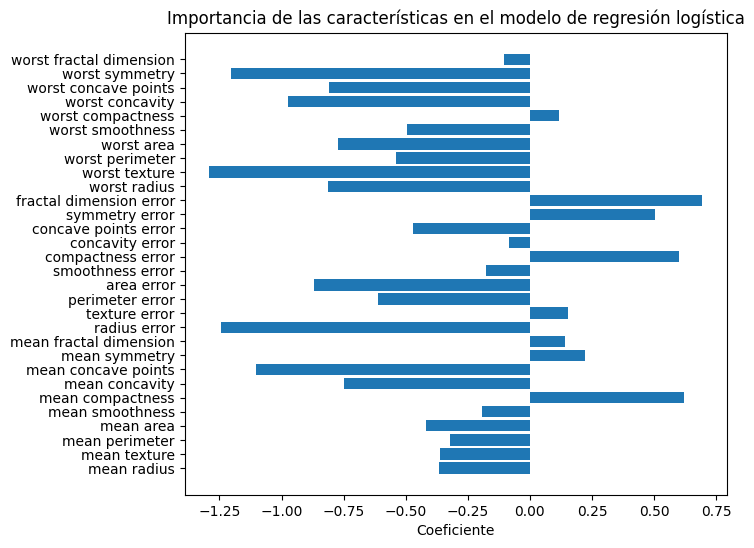

In [18]:
#Entrenar el modelo
model = LogisticRegression(max_iter=10000)

#Ajustar
model.fit(X_train, y_train)

# Coeficientes del modelo
coefficients = model.coef_[0]
features = X.columns

# Visualizar los coeficientes
plt.figure(figsize=(7, 6))
plt.barh(features, coefficients)
plt.xlabel('Coeficiente')
plt.title('Importancia de las características en el modelo de regresión logística')
plt.show()



#COMENTARIOS
Los coeficientes de regresión logística representan el cambio en las probabilidades logarítmicas de la variable dependiente
los coeficientes positivos indican que el evento se vuelve más probable y los coeficientes negativos indican que el evento se vuelve menos probable


## Sección 5: Evaluación del Modelo

**Objetivos:**  

- Realizar predicciones sobre el conjunto de prueba.  
- Evaluar el rendimiento del modelo mediante métricas (accuracy, matriz de confusión, reporte de clasificación).  


**Tareas:**  

1. Utiliza `predict` para obtener las predicciones en el conjunto de prueba.  
2. Calcula y muestra la matriz de confusión, el accuracy y el reporte de clasificación.  
3. Obtén las probabilidades predictivas con `predict_proba` y calcula la curva ROC y el AUC.  


# Completa el siguiente código:

In [16]:
#1 Hacer predicciones
y_pred = model.predict(X_test)

#2 Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Evaluar el modelo
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9824561403508771
Confusion Matrix:
[[ 62   1]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



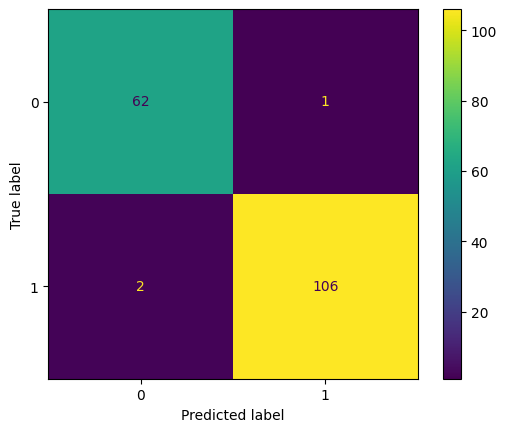

In [21]:
# VISUALIZA LA Matriz de confusión
ConfusionMatrixDisplay(conf_matrix).plot()

## Sección 6: Reflexiones y Preguntas Abiertas

**Instrucciones:**  

Responde en celdas Markdown separadas (o en comentarios) las siguientes preguntas:
1. **Interpretación de Coeficientes:**  
   - ¿Qué implica que una variable tenga un coeficiente positivo en el contexto de la regresión logística? R/un coeficiente positivo implica que un aumento en el valor de la variable predictora está asociado con un aumento en la probabilidad de que el resultado sea la clase positiva (𝑌=1)
   - ¿Cómo se relaciona este coeficiente con la probabilidad de que la observación pertenezca a la clase positiva? r/a través de los log-odds y la función sigmoide
2. **Normalización:**  
   - Explica la importancia de normalizar las características antes de entrenar un modelo de regresión logística. R/ La Normalizacion hace que las variables estén en un rango comparable
3. **Curva ROC:**  
   - ¿Qué representa la curva ROC?  R/es una representación gráfica del desempeño de un modelo de clasificación binaria
   - ¿Qué significa tener un AUC cercano a 1 en términos de rendimiento del modelo? R/Significa que el modelo es bueno
4. **Sobreajuste (Overfitting):**  
   - Menciona dos estrategias que pueden ayudar a prevenir el sobreajuste en modelos de clasificación. R/Penalizar los coeficientes usando Lasso y Ridge

**Consejo:** Justifica tus respuestas y relaciona los conceptos teóricos con los resultados obtenidos en este ejercicio.

# Fin!

Revisa que todas las celdas se ejecuten sin errores y asegúrate de que tus respuestas y comentarios sean claros y completos.

¡Éxito en tu evaluación!
